                                                                                                        29.04.21 

# Aprendizaje no supervisado


> - Ian Timothy Henry Suárez | A01701578
> - Fernando Guevara Moreno | A00828723

In [1]:
# Importamos las librerias 

import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, OPTICS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('fertility_Diagnosis.txt', names=['Season', 'Age', 'Childish diseases', 'Accident', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Number of hours spent sitting per day', 'Output'])
df

,Season,Age,Childish diseases,Accident,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Season                                 100 non-null    float64
 1   Age                                    100 non-null    float64
 2   Childish diseases                      100 non-null    int64  
 3   Accident                               100 non-null    int64  
 4   Surgical intervention                  100 non-null    int64  
 5   High fevers in the last year           100 non-null    int64  
 6   Frequency of alcohol consumption       100 non-null    float64
 7   Smoking habit                          100 non-null    int64  
 8   Number of hours spent sitting per day  100 non-null    float64
 9   Output                                 100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
# Codificamos la variable de salida Normal - 0, Alterado - 1

encoder = LabelEncoder()
out = encoder.fit_transform(df['Output'])

In [5]:
# Separamos las variables de entrada y de salida

x = df.drop('Output', axis=1)
y = out

In [6]:
# Seleccionamos nuestras variables independientes 

df2 = df.loc[:,['Age', 'Number of hours spent sitting per day']].values

# K - Means (Ian)

    K - means es un algoritmo de agrupación de n registros en k grupos. Se establece la cantidad de grupos en los que se dividirán los datos y se agrupan iterativamente de acuerdo al promedio del grupo más cercano al que pertenece el registro. Para establecer el promedio en dimensiones superiores se utiliza la distancia euclidiana. La distancia euclidiana es como un teorema de pitágoras. Se calcula la raíz cuadrada de la suma de los cuadrados de cada eje. En nuestro caso se establecieron dos grupos puesto que son los dos posibles resultados que tenemos en nuestra variable dependiente. Para poder visualizar el comportamiento de este algoritmo, establecemos al principio únicamente dos variables independientes. De esta forma podremos observar el comportamiento de la agrupación en el plano. Las variables que escogimos son las únicas dos variables continuas en nuestra base. Este algoritmo no funciona de la misma forma con variables discretas. 

In [7]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2)
y_kmeans = kmeans.fit_predict(df2)

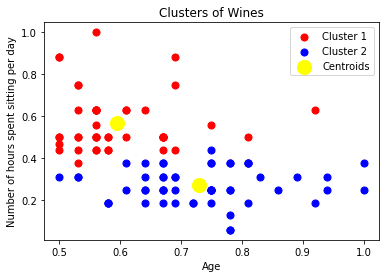

In [8]:
# Visualizamos los clusters

plt.scatter(df2[y_kmeans == 0, 0], df2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df2[y_kmeans == 1, 0], df2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Wines')
plt.xlabel('Age')
plt.ylabel('Number of hours spent sitting per day')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Number of hours spent sitting per day'>

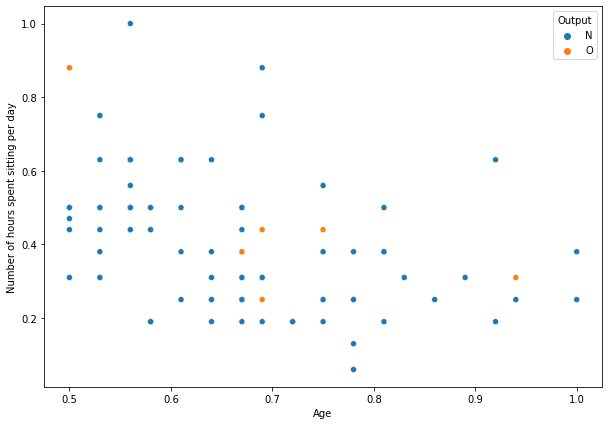

In [9]:
# Visualizamos los datos reales

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Age'], y=df['Number of hours spent sitting per day'], hue=df['Output'])

    Podemos darnos cuenta que en realidad las dos variables que se escogieron no estan muy coorelacionadas con la variable de salida. El algoritmo de k - means no fue muy efectivo para establecer nuestros grupos de forma representativa. 

# Dendrogramas (Fer)

    El dendrograma es una representacion en forma de arbol que organiza los datos, por las categorias que se le indican, con el objetivo de llegar hasta el valor deseado. 
    
    Los dendrogramas, cómo se estableció en clase, son un tipo de algoritmo no supervisado que divide los grupos en categorías y se van representando como un diagrama de árbol, en el cual se llega poco a poco al valor deseado. Es importante mencionar que este tipo de algoritmo es uno de agrupación jerárquica. Lo que hace es llevar a cabo una separación de las variables en subcategorías que le permitan encontrar el valor en la base de datos que cumpla con las especificaciones. 

    De antemano se sabe que para esta base de datos existen dos categorías, es decir, es una base de datos binaria, ya que solo tenemos los tipos de diagnósticos Normal y Alterado, lo que de entrada nos dice que la agrupación como tal no es del todo necesaria ya que sabemos, que son únicamente dos grupos.


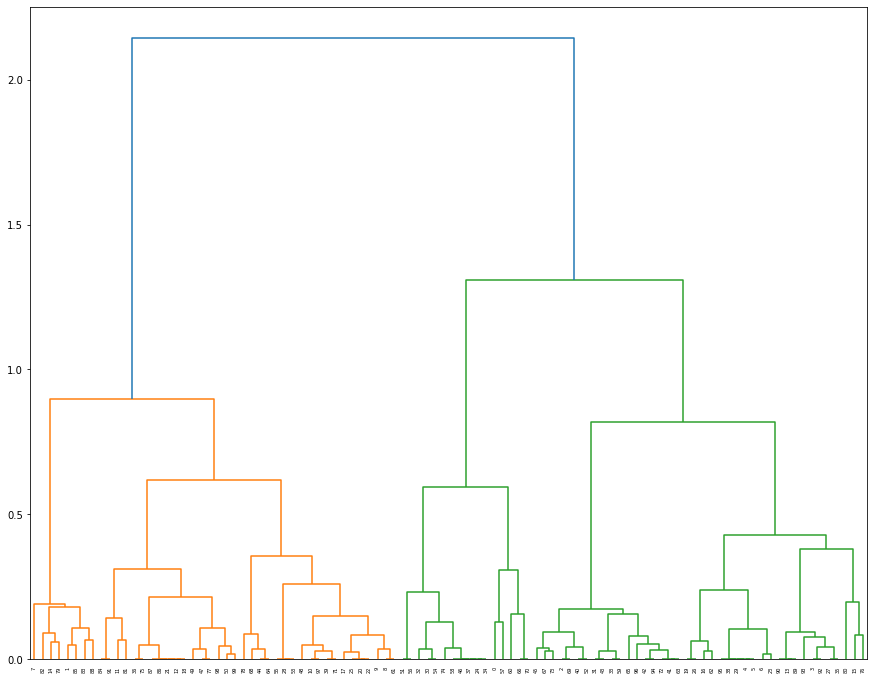

In [10]:
#Creamos el dendograma con la funcion sch

linked = linkage(df2, 'ward')
plt.figure(figsize=(15,12))
dend = sch.dendrogram(linked)

In [11]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

Text(0, 0.5, 'Number of hours sitting per day')

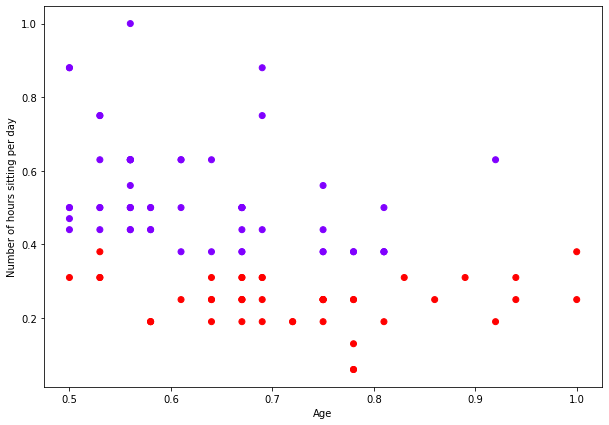

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(df2[:,0], df2[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Number of hours sitting per day")

Nos damos cuenta que en el grafico se clasifican los datos en dos clusters. En donde los de la parte posterior corresponden a aquellos que fueron diagnosticados Normal, mientras que los otros pertenecen al diagnostico Alterado.

# Density-Based Spatial Clustering (DBSCAN) (Ian)

    Este algoritmo consiste en crear grupos con base en la densidad de los datos. Es decir, qué tan juntos deben estar los datos para que puedan ser considerados como un grupo. Este algoritmo cuenta con dos parámetros; epsilon y la cantidad mínima de puntos. Epsilon consiste en la distancia radial de un punto donde se deben encontrar la cantidad mínima de puntos para que pueda ser inicializado el grupo.  El algoritmo comienza con un punto al azar y revisa cuántos puntos hay dentro del área establecida por epsilon. Si no cuenta con la cantidad mínima de puntos en la vecindad, este punto se considera como ruido y pasa al siguiente, no se establece un grupo. Si existe la cantidad mínima de puntos establecida en la vecindad del primer dato se inicializa el grupo. Posteriormente, se repite el proceso con cada uno de los puntos pertenecientes al grupo. Se revisa su vecindad y si existe la cantidad mínima de puntos, estos son parte del grupo y se expande. Cuando algún punto ya perteneciente al grupo no cuenta con la cantidad mínima de puntos, el grupo deja de expandir ahí.

In [13]:
# Creamos el modelo

dbscan = DBSCAN(eps=0.02, min_samples=5)
dbscan.fit(df2)
dbsl = dbscan.labels_
dbsl

array([-1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1,  2, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        2, -1, -1,  2,  0, -1, -1,  3,  3, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1,  3,  0, -1, -1, -1, -1],
      dtype=int64)

Text(0, 0.5, 'Number of hours sitting per day')

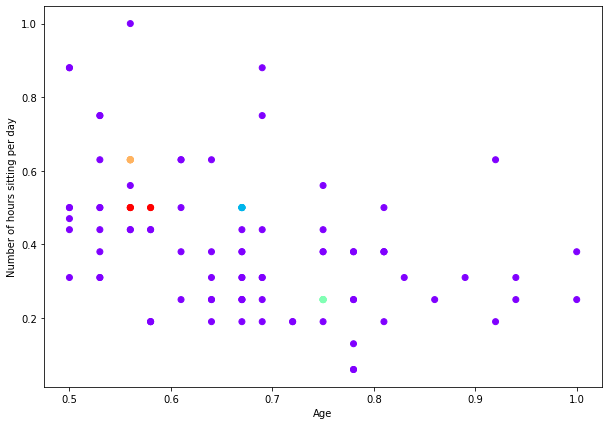

In [14]:
# Observamos los resultados

plt.figure(figsize=(10, 7))
plt.scatter(df2[:,0], df2[:,1], c=dbsl, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Number of hours sitting per day")

<AxesSubplot:xlabel='Age', ylabel='Number of hours spent sitting per day'>

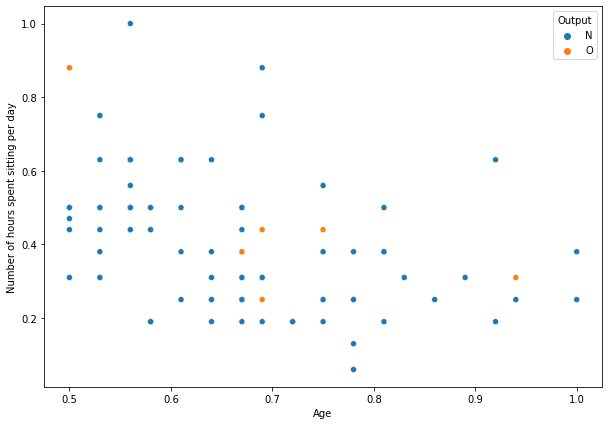

In [15]:
# Comparamos con los valores originales

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Age'], y=df['Number of hours spent sitting per day'], hue=df['Output'])

# OPTICS (Fer)

    Este algoritmo tiene una estrecha relación con el DBSCAN, ya que al igual que este, su objetivo es clasificar los datos de acuerdo a su densidad, y a partir de esta, crear los clusters Sin embargo, a diferencia del otro modelo, este mantiene la jerarquía de clusters cuando un radio de alguna vecindad o grupo es variable. 
    
	Para identificar los clusters usa la misma técnica que el “vecino más cercano” para después extenderse radialmente. Como parámetro de la función, debe haber un mínimo de muestras para que formen parte del cluster, por default está dado en 5, sin embargo este valor puede modificarse. Así mismo, la distancia máxima que debe existir entre dos puntos para que estos sean o no considerados por el agrupamiento debe ser indicada, de lo contrario se utilizará el valor por default.


In [16]:
clustering = OPTICS(max_eps=2, min_samples=22, metric="minkowski").fit(df2)
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0])

Text(0, 0.5, 'Number of hours sitting per day')

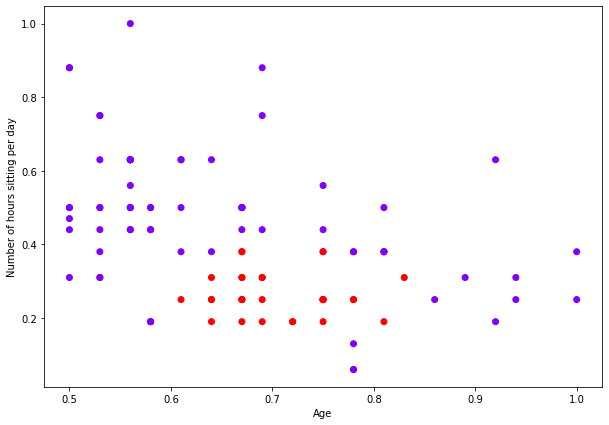

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(df2[:,0], df2[:,1], c=clustering.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Number of hours sitting per day")